# Computational Mathematics <a class="tocSkip">

## 2022/23 Assessment <a class="tocSkip">

## Release: 12PM (MIDDAY) Thursday 3 November 2022 <a class="tocSkip">

## Deadline: 4PM Friday 4th November 2022 <a class="tocSkip">

# Instructions  <a class="tocSkip">
    

- This is the assessed coursework for module "Computational Mathematics" for year 2022/23.


- **This is independent work, you cannot work in groups.**


- This notebook contains three questions. Please answer all questions.


- You will be assessed on both your code as well as your supporting descriptions/discussions of the results you obtain.


- You may use any library we used in lectures, and **you may reuse any code from lectures and homeworks**. If you use an algorithm not explicitly mentioned in the question, then please explain which algorithm you are using and why you have chosen it.


- You should submit your solutions as a single self-contained Jupyter notebooks via Github classroom - **please submit a version where you have run all of the cells and all the outputs/plots etc are visible without the marker having to run the notebook themselves**.
    
    

- If you are happy to write down your mathematical work in the form of Latex directly within this notebook then feel free to do this.


- Alternatively you may if you choose submit parts of your answers via **scans or photos of hand written pages** - feel free to use this option in particular for supplementary sketches, equations or where I have asked you to complete a task with "pen and paper". You will not be marked down for not embedding equations into your markdown cells. Please make sure that the question number each sheet you scan refers to is very clear. Even if you embed the images within the notebook, please also commit the images files to your github submission.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Question-1" data-toc-modified-id="Question-1-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Question 1</a></span></li><li><span><a href="#Question-2" data-toc-modified-id="Question-2-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Question 2</a></span></li><li><span><a href="#Question-3" data-toc-modified-id="Question-3-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Question 3</a></span></li></ul></div>

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from math import factorial
from cProfile import label

import scipy.interpolate as si
import scipy.integrate as sig
from mpltools import annotation




# Question 1

Consider the following two statements

<br>

1. All models are wrong, but some are useful.


2. A model may get the right answer for the wrong reason.

<br>

Where here we interpret a "model" as a piece of code written to provide a synthetic representation of some real world phenomena.

<br>

- Explain what each of these two statements means and why they are important. 



- What can we as "model" developers do to mitigate the issues that may be implied by these two statements.

<br>

The best answers (i.e. those that achieve the highest marks) will be clear, concise, show a depth of understanding, and synthesise material from across the module. You should provide examples to aid your explanations where appropriate, and you should not simply reuse text or examples directly from the lectures.

# Answer for Question 1
<br>
1. All models are wrong, but some are useful.
<br>

The statement shows that no model can be used for any condition. For example, Clapeyron equation for the gas pressure calculation: 
<br>
$$PV=nRT$$
The construction of the model is only useful when the molecular spacing is infinite relative to the molecules, the forces between the molecules are negligible and the molecular volume is negligible, otherwise the model is wrong. 
<br>
<br>

In addition, all models cannot be represented in the most accurate numerical form in practical, as the composition in the real world cannot be measured and represented by a finite number of digits. For example, Taylor series, natural logarithm $e$ can be represented as:
<br>
$$ e= 1 + \frac{1}{1!} + \frac{1}{2!} + \frac{1}{3!} + \frac{1}{4!} + ....$$
Taking the first 10 terms as the model to calculate $e$, the result is close to the irrational value but can't be equal to that.

In [2]:
e = 1
for i in range(1,10):
    e += 1/factorial(i)
print('e for Taylor series: ', e)
print('Error to real e:', abs(e-np.exp(1)))
print('The result is close to the real e:', np.isclose(e, np.exp(1)))

e for Taylor series:  2.7182815255731922
Error to real e: 3.0288585284310443e-07
The result is close to the real e: True


<br>
2. A model may get the right answer for the wrong reason.
<br>

The statement means wrong model design. Different from the previous statement, the model is not useful because it may apply the results of a specific situation, thereby designing in an incorrect way. In the same system or based on the same principles, the output is wrong when the input is changed due to the wrong understading during model development. For example，it is known that a curve passing through points of $(0,0)$ and $(1,1)$, but after building the model by thinking it as a linear function, it cannot pass through all the points. 


Text(0, 0.5, '$y$')

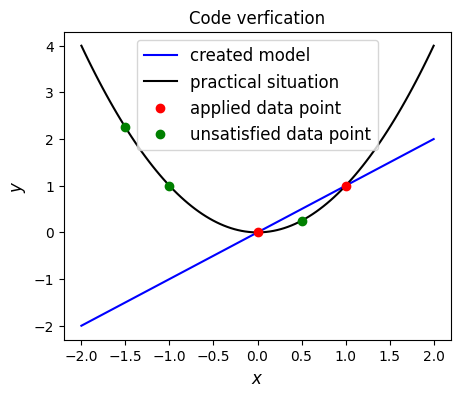

In [3]:
x0 = [0, 1]
y0 = [0, 1]
x1 = [-1.5, -1, 0.5]
y1 = [(-1.5)**2, (-1)**2, 0.5**2]
x = np.linspace(-2, 2, 100)
y = x**2
fig = plt.figure(figsize=(5, 4))
ax = fig.add_subplot(111)
ax.set_title('Code verfication')
ax.plot(x, x, 'b', label='created model')
ax.plot(x, y, 'k', label='practical situation')
ax.plot(x0, y0, 'ro', label='applied data point')
ax.plot(x1, y1, 'go', label='unsatisfied data point')
ax.legend(loc='best', fontsize=12)
ax.set_xlabel('$x$', fontsize=12)
ax.set_ylabel('$y$', fontsize=12)

Therefore, these two statements are important as the concepts to build a correct model so that it can be used with an acceptable error which would not affect the general results. 
<br>

As model developers, verificatoin and validation of the model is necessary. Verification is the process to ensure the model satisfies the requirement and realizes the function without bugs， while validation is the test for comparison of the model output and real world to show how accurate result the model can provide. In these two ways, it can be verified that the model is not built with wrong reasons, and the objective error of the model is acceptable. 

# Question 2

From our work on probability and the Gaussian distribution we know that the function

$$f(x) := \frac{1}{\sqrt{\pi}} e^{-x^2} $$

has the integral

$$\int_{-\infty}^{\infty} f(x)\, dx = 1 $$


<br>

- Firstly, plot $f(x)$ for $x$ between -10 and 10 and demonstrate how you would use interpolation to approximate this function. What considerations should you make when seeking a good interpolating function?

<br>

- Now suppose that we didn't know that the integral of this function was 1. Perform quadratue to approximate this integral. Based on the nature of the function and the integral I've asked you to consider comment on what aspects of this problem need to be considered when seeking an accurate answer.


- Demonstrate how you would reliably deal with the fact that I've asked you to compute an integral over an infinite $x$ interval? 


- Demonstrate ways in which you might go about trying to get the most accurate result in the most efficient manner.


<br>

In this question feel free to make use of Scipy algorithms if you wish to make points or to check your results against, but the majority of your calculations and demonstrations should be performed using your own implementations of quadrature rules - i.e. you shouldn't use the most sophisticated method you can find without demonstrating a thorough understanding of the underlying algorithm and its implementation.

# Answer for Question 2
### Interpolation
The function for $x$ between -10 and 10 is plotted. Based on the shape in the determined range, Vandermonde matrix for multiple data points is firstly chosen. The polynomial that fits $n+1$ data points is represented as the following matrix equation.
$$
\begin{pmatrix}
1 & x_0 & x_0^2 & ... & x_0^n\\
1 & x_1 & x_1^2 & ... & x_1^n\\
1 & x_2 & x_2^2 & ... & x_2^n\\
...\\
1 & x_n & x_n^2 & ... & x_n^n\\
\end{pmatrix}
\begin{pmatrix}
a_0\\
a_1\\
a_2\\
...\\
a_n\\
\end{pmatrix}
=
\begin{pmatrix}
y_0\\
y_1\\
y_2\\
...\\
y_n\\
\end{pmatrix} \;\;\;\;\;\;\;\text{or equivalently in matrix notation} \;\;\;\;\;\; V\boldsymbol{a} =\boldsymbol{y}.
$$


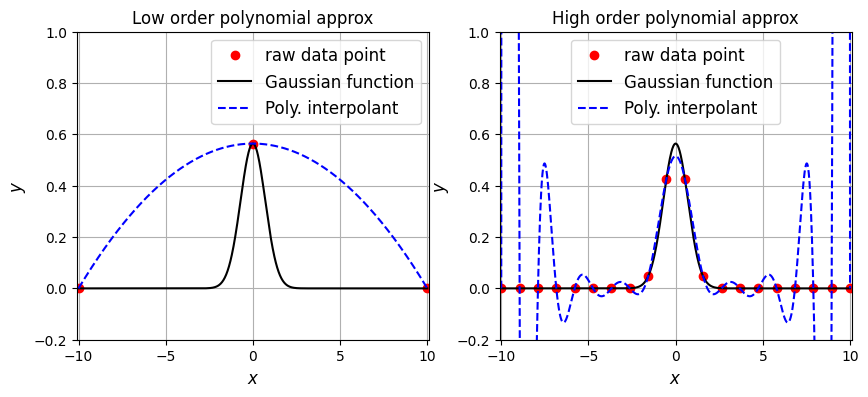

In [5]:
def f(x):
    return np.exp(-x**2)/np.sqrt(np.pi)

xi1 = np.linspace(-10, 10., 3)
yi1 = [f(i) for i in xi1]

V1 = np.vander(xi1, increasing=True)
a1 = np.linalg.solve(V1, yi1)

xi2 = np.linspace(-10, 10., 20)
yi2 = [f(i) for i in xi2]

V2 = np.vander(xi2, increasing=True)
a2 = np.linalg.solve(V2, yi2)

fig = plt.figure(figsize=(10, 4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

x = np.linspace(-10., 10., 1000)

def plot_point(xi, yi, x, y, ax):
    ax.plot(xi, yi, 'ro', label='raw data point')
    ax.plot(x, y, 'k', label='Gaussian function')
    ax.set_xlabel('$x$', fontsize=12)
    ax.set_ylabel('$y$', fontsize=12)
    ax.grid(True)
    ax.set_xlim(-10.1, 10.1)
    ax.set_ylim(-0.2, 1)

plot_point(xi1, yi1, x, f(x), ax1)
plot_point(xi2, yi2, x, f(x), ax2)

p1 = np.poly1d(np.flip(a1, 0))
poly1 = p1(x)

p2 = np.poly1d(np.flip(a2, 0))
poly2 = p2(x)

ax1.set_title('Low order polynomial approx', fontsize=12)
ax1.plot(x, poly1, '--b', label='Poly. interpolant')
ax1.legend(loc='best', fontsize=12)

ax2.set_title('High order polynomial approx', fontsize=12)
ax2.plot(x, poly2, '--b', label='Poly. interpolant')
ax2.legend(loc='best', fontsize=12)


During the test in this range of $x$, it is found that the effect of low-order polynomial is not ideal especially when the function value approaches to zero. Hence, high order polynomial is chosen, but which leads to strong oscillation. 
<br>

Therefore, when seeking a good interpolating function with given $N+1$ pieces of distinct data, the highest degree of $N$ dominates the results. It is considerable to choose the suitable order for representation. In consideration of the oscillation, which may due to the fixed interval of the raw data points, a better solution is to use different $x$ interval. A smaller interval should be applied where the oscillation of the interpolation is high.

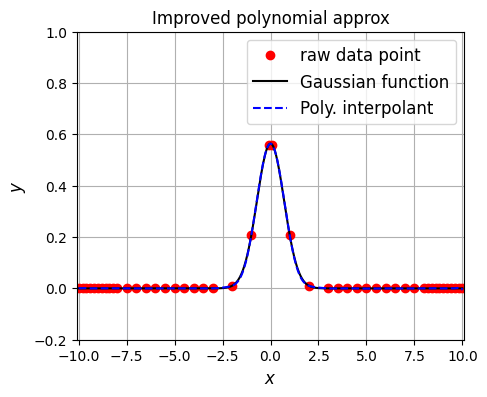

In [6]:
def f(x):
    return np.exp(-x**2)/np.sqrt(np.pi)

xi1 = [3+0.5*i for i in range(11)]
xi2 = [0.1, 1.,2.]
xi3 = [8.2+0.2*i for i in range(11)]
xip = np.concatenate([xi1,xi2])
xip = np.concatenate([xip,xi3])
xin = -xip.T
xi = np.concatenate([xin,xip])

yi = [f(i) for i in xi]

V = np.vander(xi, increasing=True)
a = np.linalg.solve(V, yi)

fig = plt.figure(figsize=(5, 4))
ax1 = fig.add_subplot(111)

x = np.linspace(-10., 10., 1000)

def plot_point(xi, yi, x, y, ax):
    ax.plot(xi, yi, 'ro', label='raw data point')
    ax.plot(x, y, 'k', label='Gaussian function')
    ax.set_xlabel('$x$', fontsize=12)
    ax.set_ylabel('$y$', fontsize=12)
    ax.grid(True)
    ax.set_xlim(-10.1, 10.1)
    ax.set_ylim(-0.2, 1)

plot_point(xi, yi, x, f(x), ax1)

p = np.poly1d(np.flip(a, 0))
poly = p(x)

ax1.set_title('Improved polynomial approx', fontsize=12)
ax1.plot(x, poly, '--b', label='Poly. interpolant')
ax1.legend(loc='best', fontsize=12)



The result seems to be more close to the Gaussian distribution. However, the limitation is that the raw data points for different intervals are chosen manually based on the shape of the curve in a determined range. It might be better to use piecewise polynomial interpolation to focus on polynomial approximation in each small range of the curve by using the polynomial function directly. In general, the interpolation performs well with the consideration of polynomial orders and sampling intervals. 

<br>

<br>

### Quadrature for integration approximation
To perform quadrature for integration approximation, Simpson's rule is used by:
\begin{align*}
I_S = \frac{(b-a)}{6}\left( f \left ( a\right ) + 4f \left ( c\right ) + f\left ( b\right )\right),
\end{align*}

where $a$ and $b$ are the end points of an interval and $c = \left ( a+b\right )/2$ is the midpoint.
<br>

The method is suitable when integrating the non-linear function with minimized error and rapid converge speed compared with rectangle and trapezoidal rules. In addition, the error of Simpson's rule decreases more significantly than the other two rules for larger number of intervals. To consider the validation of integration and minimization of error, the range of the area is chosen at the place where the value of Gaussian function is converged to zero with a certain number of intervals. 


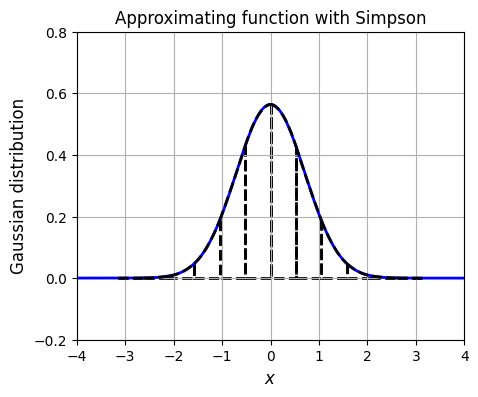

The sum of the areas of the Simpson rule is: 0.999990861543
The computed area almost equals to 1:  True


In [9]:
def f(x):
    return np.exp(-x**2)/np.sqrt(np.pi)

x = np.linspace(-10, 10, 1000)
y = f(x)

number_intervals = 12
xi = np.linspace(-np.pi, np.pi, number_intervals+1)

fig = plt.figure(figsize=(5, 4))
ax1 = plt.subplot(111)
ax1.plot(x, y, 'b', lw=2)
ax1.margins(0.1)

ax1.set_xlabel('$x$', fontsize=12)
ax1.set_ylabel('Gaussian distribution', fontsize=12)
ax1.set_title('Approximating function with Simpson', fontsize=12)
ax1.grid(True)

I_S = 0.0

for i in range(number_intervals):
    # use a non-closed Polygon to visualise the straight sides of each interval 
    ax1.add_patch(Polygon(np.array([[xi[i], f(xi[i])], [xi[i], 0], [xi[i+1], 0], [xi[i+1], f(xi[i+1])]]),
                          closed=False, fill=False, ls='--', color='k', lw=2))
    # add the quadratic top - fit a quadratic using numpy
    poly_coeff = np.polyfit((xi[i], (xi[i] + xi[i+1])/2.0, xi[i + 1]),
                            (f(xi[i]), f((xi[i] + xi[i+1])/2.0), f(xi[i+1])), 2)
    p1 = np.poly1d(poly_coeff)
    # plot the quadratic using 20 plotting points within the interval 
    ax1.plot(np.linspace(xi[i], xi[i+1], 20),
             p1(np.linspace(xi[i], xi[i+1], 20)), ls='--', color='k', lw=2)
    # add in the area of the interval shape to our running total using Simpson's formula
    I_S += ((xi[i+1] - xi[i])/6.) * (f(xi[i]) + 4 *
                                     f((xi[i] + xi[i+1])/2.0) + f(xi[i+1]))

ax1.set_xlim(-4, 4)
ax1.set_ylim(-0.2, 0.8)


plt.show()
print('The sum of the areas of the Simpson rule is: {:.12f}'.format(I_S))
print('The computed area almost equals to 1: ', np.isclose(I_S, 1))


### Integral over an infinite $x$
To deal with the infinite $x$ interval, the reliable way with current codes is to prove that the derivation of the Gaussian distribution has the characteristic of convergence. Based on Cauchy's convergence test, the intrgral of Gaussian distribution for different natrue numbers of $x$ can be added into a sequence. The convergence of the sequence represents the convergence of the infinite integral of the equation. To prove the convergence of the sequence, a threshold is determined. If the integral satisfies the trend being close to one destination until smaller than the threshold, it is proved that the intergal of the components in the sequence is equivalent to the integral over an infinite $x$. Solving this problem, scipy function for integral is appied to ensure accuracy.


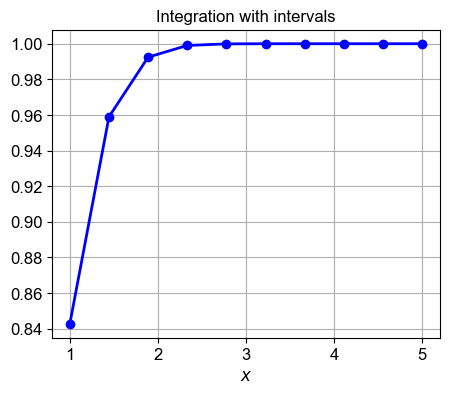

In [351]:
def f(x):
    return np.exp(-x**2)/np.sqrt(np.pi)


x = np.linspace(1,5,10)
area = np.empty(len(x))

for i, xi in enumerate(x):
    area[i],_= sig.quad(f, -xi, xi)

fig = plt.figure(figsize=(5, 4))
ax1 = plt.subplot(111)

ax1.plot(x, area, '-bo', lw=2, label='intergral area')
ax1.set_xlabel('$x$', fontsize=12)
ax1.set_title('Integration with intervals', fontsize=12)
ax1.grid(True)



According to the figure, a threshould can be set. When the difference between two neighbouring components in the area list is smaller than the threshold, the convergence is proved. Therefore, the integral of the point that triggers the threshold condition can be used to represent the integral of infinite $x$ range. 
<br>

<br>

### Demonstration of accrate methods
Using the developed codes, there are three adjustable components: the integral rule, the number of intervals, and the range of $x$. There are rectangle method, trapizoidal rule, and Simpson's rule for integration. The method would not be changed as complexities are similar. To improve efficiency, the inverval should be controlled but satisfies a normal performance of Simplson's rule. The range of $x$ can be limited as the gradient of the Gaussian distribution reduces with the increase of $x$, meaning that with the increase of area for large $x$, it would cost a lot of computation time to achieve a small digit improvement. Therefore, the codes above is suitable for both accuracy and efficiency, instead of considering the infinite $x$. For more accurate and effecient way, functions in scipy and sympy such as *integration* can be applied if allowed.

# Question 3

Consider a function of one independent variable: $f(x)$.

<br>

The first-order forward difference approximation to the derivative of $f$ at location $x$ is given by

$$ f'(x)\approx \frac{f(x+\Delta x)-f(x)}{\Delta x} $$

The second-order central difference approximation to the derivative of $f$ at location $x$ is given by 

$$ f'(x)\approx \frac{f(x+\Delta x)-f(x - \Delta x)}{2 \Delta x} $$

The fourth-order central difference approximation to the derivative of $f$ at location $x$ is given by

$$ f'(x)\approx \frac{-f(x + 2\Delta x) + 8 f(x+\Delta x)- 8 f(x - \Delta x) + f(x - 2\Delta x)}{12 \Delta x} $$

<br>

- Use Taylor series analyses to confirm the orders of accuracies of the above approximations.

<br>

- Implement these approximations in code, and rigorously verify your implementations using the fact that

$$\left. \frac{d}{dx} \sin (x) \right|_{x=1} = \cos(1) $$

- Explain why such a verification exercise give you faith that your implementations are correct.

<br>

- Demonstrate what happens if you take $\Delta x$ values that are too large or too small, i.e. as $\Delta x\rightarrow 0 $ and $\Delta x\rightarrow \infty $. Comment on whether the behaviour you observe is what you expect, and why?

# Answer for Question 3

### Orders of accuracies

The **first-order forward difference approximation** is based on the error of the second-order term of Taylor series, representing as:
\begin{align*}
f(x+ \Delta x) &= f(x)+\Delta x f'(x)+\mathcal{O}(\Delta x^2)\\
\end{align*}
The equation is changed into:
$$ f(x+\Delta x)-f(x)=\Delta xf'(x) + \mathcal{O}(\Delta x^2)$$
$$ f'(x)=\frac{f(x+\Delta x)-f(x)}{\Delta x} + \mathcal{O}(\Delta x),$$
The accuracy is limited with the first-order error term.


The **second-order central difference approximation** has the subtraction with two equations as below:
\begin{align*}
f(x+\Delta x) &= f(x)+\Delta x f'(x)+\frac{\Delta x^2}{2}f''(x) + \mathcal{O}(\Delta x^3)\\
f(x-\Delta x) &= f(x)- \Delta x f'(x)+\frac{(-\Delta x)^2}{2}f''(x) + \mathcal{O}((-\Delta x)^3)\\
\end{align*}
With the change of sign:
\begin{align*}
f(x+\Delta x) &= f(x)+\Delta x f'(x)+\frac{\Delta x^2}{2}f''(x) + \mathcal{O}(\Delta x^3)\\
f(x-\Delta x) &= f(x)-\Delta x f'(x)+\frac{\Delta x^2}{2}f''(x) + \mathcal{O}(\Delta x^3)
\end{align*}
Performing subtraction, the equation is represented:
$$ f(x+\Delta x)-f(x-\Delta x)=2\Delta xf'(x) + \mathcal{O}(\Delta x^3)$$
$$ f'(x)=\frac{f(x+\Delta x)-f(x-\Delta x)}{2\Delta x} + \mathcal{O}(\Delta x^2)$$
The accuracy is limited with the second-order error term.


The **fourth-order central difference approximation** is similar to the seocond-order but with two more terms.
\begin{align*}
f(x+\Delta x) &= f(x)+\Delta x f'(x)+\frac{\Delta x^2}{2}f''(x)+\frac{\Delta x^3}{6}f'''(x)+\frac{\Delta x^4}{24}f''''(x) + \mathcal{O}(\Delta x^5)\\
f(x-\Delta x) &= f(x)-\Delta x f'(x)+\frac{(-\Delta x^2)}{2}f''(x)+\frac{(-\Delta x^3)}{6}f'''(x)+\frac{(-\Delta x^4)}{24}f''''(x) + \mathcal{O}(\Delta x^5)\\
\end{align*}
The process dealing with one $\Delta x$ is same to the previous one:
\begin{align*}
f(x+\Delta x) &= f(x)+\Delta x f'(x)+\frac{\Delta x^2}{2}f''(x)+\frac{\Delta x^3}{6}f'''(x)+\frac{\Delta x^4}{24}f''''(x) + \mathcal{O}(\Delta x^5)\\
f(x-\Delta x) &= f(x)-\Delta x f'(x)+\frac{\Delta x^2}{2}f''(x)-\frac{\Delta x^3}{6}f'''(x)+\frac{\Delta x^4}{24}f''''(x) + \mathcal{O}(\Delta x^5)\\
\end{align*}
For the interval of $2\Delta x$, the equations are processed as follows:
\begin{align*}
f(x+2\Delta x) &= f(x)+2\Delta x f'(x)+\frac{(2\Delta x)^2}{2}f''(x)+\frac{(2\Delta x)^3}{6}f'''(x)+\frac{(2\Delta x)^4}{24}f''''(x) + \mathcal{O}(\Delta x^5)\\
f(x-2\Delta x) &= f(x)-2\Delta x f'(x)+\frac{(2\Delta x)^2}{2}f''(x)-\frac{(2\Delta x)^3}{6}f'''(x)+\frac{(2\Delta x)^4}{24}f''''(x) + \mathcal{O}(\Delta x^5)\\
f(x+2\Delta x) &= f(x)+2\Delta x f'(x)+\frac{4\Delta x^2}{2}f''(x)+\frac{8\Delta x^3}{6}f'''(x)+\frac{16\Delta x^4}{24}f''''(x) + \mathcal{O}(\Delta x^5)\\
f(x-2\Delta x) &= f(x)-2\Delta x f'(x)+\frac{4\Delta x^2}{2}f''(x)-\frac{8\Delta x^3}{6}f'''(x)+\frac{16\Delta x^4}{24}f''''(x) + \mathcal{O}(\Delta x^5)\\
\end{align*}
The subtractions are performed,
$$ f(x+\Delta x)-f(x-\Delta x)=2\Delta xf'(x)+\frac{\Delta x^3}{3}f'''(x) + \mathcal{O}(\Delta x^5).$$
$$ f(x+2\Delta x)-f(x-2\Delta x)=4\Delta xf'(x) + \frac{8\Delta x^3}{3}f'''(x) + \mathcal{O}(\Delta x^5).$$
$$ 8f(x+\Delta x)-8f(x-\Delta x)=16\Delta xf'(x)+\frac{8\Delta x^3}{3}f'''(x) + \mathcal{O}(\Delta x^5).$$
The third derivative can be cancelled and the approximation eqquation is found out.
$$ (8f(x+\Delta x)-8f(x-\Delta x))-(f(x+2\Delta x)-f(x-2\Delta x))=12\Delta xf'(x) + \mathcal{O}(\Delta x^5).$$
$$ f'(x) = \frac{-f(x + 2\Delta x) + 8 f(x+\Delta x)- 8 f(x - \Delta x) + f(x - 2\Delta x)}{12 \Delta x} + \mathcal{O}(\Delta x^4) $$
The accuracy is limited with the fourth-order error term.
<br>



### Approximations implementation in code
The three approximations are applied in code in comparison with the practical value of the derivative function $cos(1)$. To make the performance of each approximation more distinct, each approaxmated curve is plotted with the practical $cos(x)$ within the range of 0 to $\pi$ for different $x$ interval.

First-order difference approximation (for dx=1e-3) error with cos(1):  0.0004208255078128609
Second-order central approximation (for dx=1e-3) error with cos(1):  9.00503946965614e-08
Fourth-order central approximation (for dx=1e-3) error with cos(1):  1.6653345369377348e-15


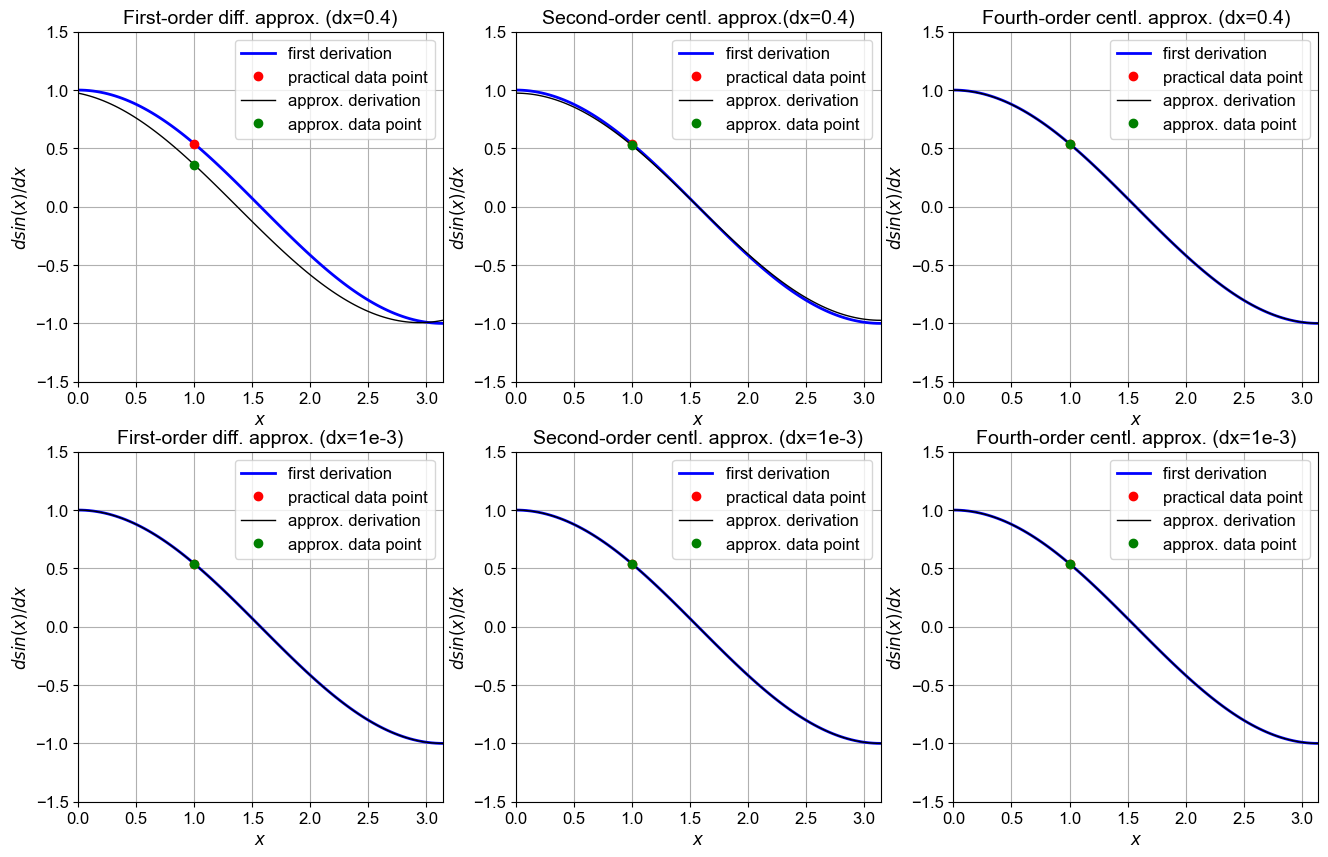

In [352]:
def f(x):
    return np.sin(x)

def df1(x, dx):
    return (f(x+dx)-f(x))/dx

def df2(x, dx):
    return (f(x+dx)-f(x-dx))/(2*dx)

def df3(x, dx):
    return (-f(x+2*dx)+8*f(x+dx)-8*f(x-dx)+f(x-2*dx))/(12*dx)


x = np.linspace(0, np.pi, 100)
dxh = 0.4
dxl = 1e-3
x0 = 1

fig = plt.figure(figsize=(16, 10))
ax1 = plt.subplot(231)
ax1.set_title('First-order diff. approx. (dx=0.4)', fontsize=14)
ax2 = plt.subplot(232)
ax2.set_title('Second-order centl. approx.(dx=0.4)', fontsize=14)
ax3 = plt.subplot(233)
ax3.set_title('Fourth-order centl. approx. (dx=0.4)', fontsize=14)
ax4 = plt.subplot(234)
ax4.set_title('First-order diff. approx. (dx=1e-3)', fontsize=14)
ax5 = plt.subplot(235)
ax5.set_title('Second-order centl. approx. (dx=1e-3)', fontsize=14)
ax6 = plt.subplot(236)
ax6.set_title('Fourth-order centl. approx. (dx=1e-3)', fontsize=14)


def plot_data(df, x, x0, dx, ax):
    ax.plot(x, np.cos(x),'b', lw=2, label='first derivation')
    ax.plot(x0, np.cos(x0), 'ro', label='practical data point')
    ax.plot(x, df(x,dx), 'k', lw=1, label='approx. derivation')
    ax.plot(x0, df(x0, dx), 'go', label='approx. data point')
    ax.set_xlabel('$x$', fontsize=12)
    ax.set_ylabel('$dsin(x)/dx$', fontsize=12)

    ax.grid(True)
    ax.legend(loc='best', fontsize=12)
    ax.set_xlim(0, np.pi)
    ax.set_ylim(-1.5, 1.5)

plot_data(df1, x, x0, dxh, ax1)
plot_data(df2, x, x0, dxh, ax2)
plot_data(df3, x, x0, dxh, ax3)
plot_data(df1, x, x0, dxl, ax4)
plot_data(df2, x, x0, dxl, ax5)
plot_data(df3, x, x0, dxl, ax6)

error1 = abs(df1(x0, dxl)-np.cos(x0))
error2 = abs(df2(x0, dxl)-np.cos(x0))
error3 = abs(df3(x0, dxl)-np.cos(x0))

print('First-order difference approximation (for dx=1e-3) error with cos(1): ', error1)
print('Second-order central approximation (for dx=1e-3) error with cos(1): ', error2)
print('Fourth-order central approximation (for dx=1e-3) error with cos(1): ', error3)



### Implementation Analysis

As shown above, a range from 0 to $\pi$ is chosen to find out the approximation with various points. As the trend made by the points which are not limited to $x=1$ almost coincides with the actual derivative, it shows that the implementation is correct. In addition, two different intervals are chosen to prove that the smaller interval has better approximation performance, and the trend using the interval of 1e-3 is closer to the practical one. The errors are also printed, which can be found that the first-order difference approximation has the worse performance, while the higher order central approximation is the most useful model among these three methods. However, the error is acceptable with the right trend of $cos(x)$ even if the first order performance has its limitation. Therefore, the implementation is generally correct with the verification that the models are useful with no computing bugs. 

### Extreme $\Delta x$

To find out the relation between $\Delta x$ for $x=1$ and the accuracy, comparison for a descending $\Delta x$ with error to $cos(1)$ is biult. 

The value of cos(1) is:  0.5403023058681398
The direvation tends to be close to:  0.5403023058685636
The error tends to be converged to:  1.6653345369377348e-15


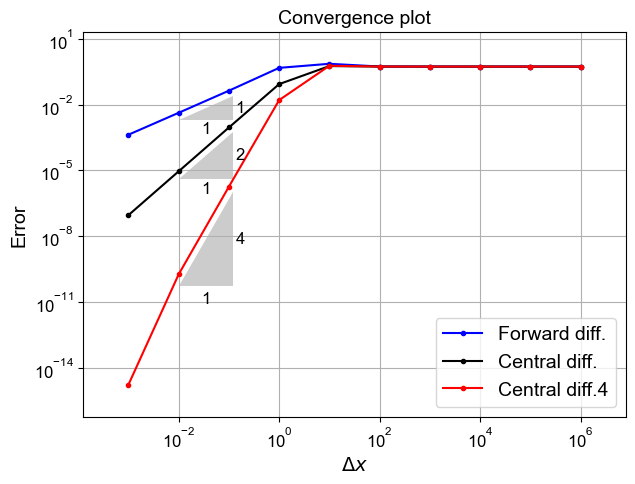

In [353]:
def f(x):
    return np.sin(x)

def df1(x, dx):
    return (f(x+dx)-f(x))/dx

def df2(x, dx):
    return (f(x+dx)-f(x-dx))/(2*dx)

def df3(x, dx):
    return (-f(x+2*dx)+8*f(x+dx)-8*f(x-dx)+f(x-2*dx))/(12*dx)

x0 = 1

error1 = []
error2 = []
error3 = []
dx_all = []
dx = 1000000
for i in range(10):
    error1.append(abs(df1(x0, dx)-np.cos(x0)))
    error2.append(abs(df2(x0, dx)-np.cos(x0)))
    error3.append(abs(df3(x0, dx)-np.cos(x0)))
    dx_all.append(dx)
    dx = dx / 10 

fig = plt.figure(figsize=(7, 5))
ax1 = plt.subplot(111)
ax1.margins(0.1)
ax1.loglog(dx_all, error1, 'b.-', label='Forward diff.')
ax1.loglog(dx_all, error2, 'k.-', label='Central diff.')
ax1.loglog(dx_all, error3, 'r.-', label='Central diff.4')
ax1.set_xlabel('$\Delta x$', fontsize=14)
ax1.set_ylabel('Error', fontsize=14)
ax1.set_title('Convergence plot', fontsize=14)
ax1.grid(True)
ax1.legend(loc='best', fontsize=14)
annotation.slope_marker((1e-2, 2e-3), (1, 1), ax=ax1,
                        size_frac=0.1, pad_frac=0.05, text_kwargs = dict(fontsize = 12))
annotation.slope_marker((1e-2, 4e-6), (2, 1), ax=ax1,
                        size_frac=0.1, pad_frac=0.05, text_kwargs = dict(fontsize = 12));
annotation.slope_marker((1e-2, 5e-11), (4, 1), ax=ax1,
                        size_frac=0.1, pad_frac=0.05, text_kwargs = dict(fontsize = 12));

print('The value of cos(1) is: ', np.cos(1))
print('The direvation tends to be close to: ', df3(x0, dx))
print('The error tends to be converged to: ', error3[9])



The results show the different slope of each approximation but same trend that converges to the same value. According to the approximation equations, it can also be found that when $\Delta x$ reduces, the error would reduce and tend to be 0. It leads to the convergence of derivation to 1 as $\Delta x\rightarrow 0 $. When $\Delta x$ increases to high power, the error is close to a certain value. Substracted with the practical value, the computed derivation tends to be $cos(1)$ when $\Delta x\rightarrow \infty $. The result satisfies the equations that when $\Delta x\rightarrow 0 $, both the numerator and denominator is close to zero and the approximated derivation $f'(x)\rightarrow 1 $. When $\Delta x\rightarrow \infty $, both the denominator is close to infinity which makes the approximated derivation $f'(x)\rightarrow cos(1) $. 